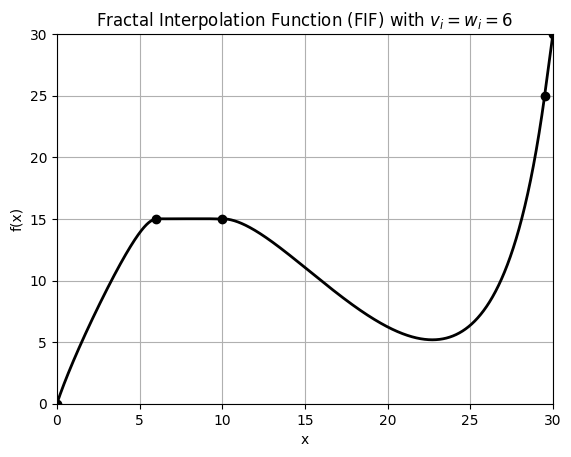

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points (xi, fi)
x_values = [0, 6, 10, 29.5, 30]
f_values = [0.01, 15, 15, 25, 30]

# Coefficients for the IFS (based on fractal transformation)
alpha = [0.001, 0.001, 0.001, 0.001]  # Alpha values, scaling for f_values
a = [0.2, 0.1333, 0.65, 0.0167]  # a_i values for transformations
b = [0, 6, 10, 29.5]  # b_i values for transformations

# Derivate values at the knots
d = [3.9969, 0, 0, 9.7628, 10.237]

# Interval lengths h_i
h = [6, 4, 19.5, 0.5]

# Constants for vi and wi (shape parameters)
wi = [6, 6, 6, 6]
vi = [6, 6, 6, 6]
# wi = [6000, 6000, 6000, 6000]
# vi = [6000, 6000, 6000, 6000]

# Function to compute theta(variable)
def theta(x, x1, x_n):
    return (x - x1) / (x_n - x1)

# Function to compute P_i(θ) for each interval using rational fractal idea
def P_i(theta, f_i, f_i1, h_i, d_i, d_i1, alpha_i, x1, xn, vi, wi):
    term1 = (f_i - alpha_i * f_values[0]) * (1 - theta) ** 3
    term2 = (vi * f_i + h_i * d_i - alpha_i * ((xn - x1) * d[0] + f_values[0] * vi)) * theta * (1 - theta) ** 2
    term3 = (wi * f_i1 - h_i * d_i1 + alpha_i * ((xn - x1) * d[-1] - f_values[-1] * wi)) * theta ** 2 * (1 - theta)
    term4 = (f_i1 - alpha_i * f_values[-1]) * theta ** 3
    return term1 + term2 + term3 + term4

# Function to compute Q_i(θ) for each interval
def Q_i(theta, vi, wi):
    return (1 - theta) ** 3 + vi * theta * (1 - theta) ** 2 + wi * theta ** 2 * (1 - theta) + theta ** 3

# Function to compute FIF at a given x value, with return statement as requested
def fractal_interpolation_function(x):
    for i in range(len(x_values) - 1):
        if x_values[i] <= x <= x_values[i + 1]:
            xi, xi1 = x_values[i], x_values[i + 1]
            fi, fi1 = f_values[i], f_values[i + 1]
            di, di1 = d[i], d[i + 1]
            hi = h[i]
            alpha_i = alpha[i]
            vi_i = vi[i]
            wi_i = wi[i]
            theta_val = theta(x, xi, xi1)
            P_val = P_i(theta_val, fi, fi1, hi, di, di1, alpha_i, x_values[0], x_values[-1], vi_i, wi_i)
            Q_val = Q_i(theta_val, vi_i, wi_i)
            return alpha_i * fi + P_val / Q_val
    return None

# Generate a range of x values for plotting
x_range = np.linspace(min(x_values), max(x_values), 10000)  # Increase number of points for smoothness
fif_values = [fractal_interpolation_function(x) for x in x_range]

# Plot the data points and the FIF curve
plt.plot(x_range, fif_values, label='FIF curve', color='black', linewidth=2)
plt.scatter(x_values, f_values, color='black', zorder=5)
plt.title(r'Fractal Interpolation Function (FIF) with $v_i = w_i = 6$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

# Set custom x and y axis limits based on the desired output
plt.xlim(0, 30)
plt.ylim(0, 30)

# Show plot
plt.show()

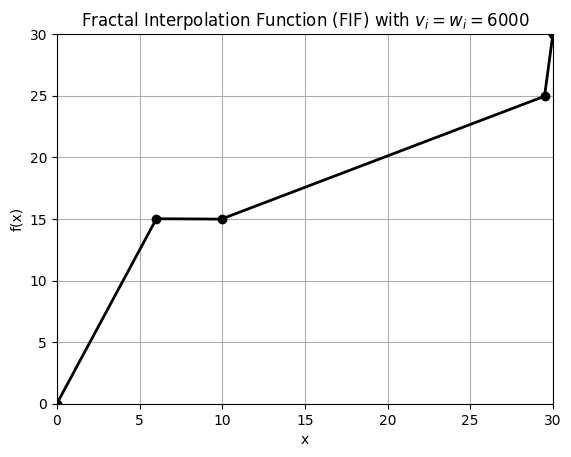

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points (xi, fi)
x_values = [0, 6, 10, 29.5, 30]
f_values = [0.01, 15, 15, 25, 30]

# Coefficients for the IFS (based on fractal transformation)
alpha = [0.001, 0.001, 0.001, 0.001]  # Alpha values, scaling for f_values
a = [0.2, 0.1333, 0.65, 0.0167]  # a_i values for transformations
b = [0, 6, 10, 29.5]  # b_i values for transformations

# Derivatives at the points (vertical scaling factors)
d = [3.9969, 0, 0, 9.7628, 10.237]

# Interval lengths h_i
h = [6, 4, 19.5, 0.5]

# Constants for vi and wi (shape parameters)
# wi = [6, 6, 6, 6]
# vi = [6, 6, 6, 6]
wi = [6000, 6000, 6000, 6000]
vi = [6000, 6000, 6000, 6000]

# Function to compute theta
def theta(x, x1, x_n):
    return (x - x1) / (x_n - x1)

# Function to compute P_i(θ) for each interval using rational fractal idea
def P_i(theta, f_i, f_i1, h_i, d_i, d_i1, alpha_i, x1, xn, vi, wi):
    term1 = (f_i - alpha_i * f_values[0]) * (1 - theta) ** 3
    term2 = (vi * f_i + h_i * d_i - alpha_i * ((xn - x1) * d[0] + f_values[0] * vi)) * theta * (1 - theta) ** 2
    term3 = (wi * f_i1 - h_i * d_i1 + alpha_i * ((xn - x1) * d[-1] - f_values[-1] * wi)) * theta ** 2 * (1 - theta)
    term4 = (f_i1 - alpha_i * f_values[-1]) * theta ** 3
    return term1 + term2 + term3 + term4

# Function to compute Q_i(θ) for each interval
def Q_i(theta, vi, wi):
    return (1 - theta) ** 3 + vi * theta * (1 - theta) ** 2 + wi * theta ** 2 * (1 - theta) + theta ** 3

# Function to compute FIF at a given x value, with return statement as requested
def fractal_interpolation_function(x):
    for i in range(len(x_values) - 1):
        if x_values[i] <= x <= x_values[i + 1]:
            xi, xi1 = x_values[i], x_values[i + 1]
            fi, fi1 = f_values[i], f_values[i + 1]
            di, di1 = d[i], d[i + 1]
            hi = h[i]
            alpha_i = alpha[i]
            vi_i = vi[i]
            wi_i = wi[i]
            theta_val = theta(x, xi, xi1)
            P_val = P_i(theta_val, fi, fi1, hi, di, di1, alpha_i, x_values[0], x_values[-1], vi_i, wi_i)
            Q_val = Q_i(theta_val, vi_i, wi_i)
            return alpha_i * fi + P_val / Q_val  # Modified return statement
    return None

# Generate a range of x values for plotting
x_range = np.linspace(min(x_values), max(x_values), 10000)  # Increase number of points for smoothness
fif_values = [fractal_interpolation_function(x) for x in x_range]

# Plot the data points and the FIF curve
plt.plot(x_range, fif_values, label='FIF curve', color='black', linewidth=2)
plt.scatter(x_values, f_values, color='black', zorder=5)
plt.title(r'Fractal Interpolation Function (FIF) with $v_i = w_i = 6000$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

# Set custom x and y axis limits based on the desired output
plt.xlim(0, 30)
plt.ylim(0, 30)

# Show plot
plt.show()